<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install pyupbit

In [11]:
import pyupbit

In [12]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-btc", interval="minute60")
df

,open,high,low,close,volume,value
2022-01-06 19:00:00,52650000.0,53004000.0,52608000.0,52980000.0,181.699964,9.594244e+09
2022-01-06 20:00:00,52959000.0,53105000.0,52812000.0,53020000.0,174.957938,9.265356e+09
2022-01-06 21:00:00,53021000.0,53150000.0,52816000.0,53109000.0,301.042950,1.594170e+10
2022-01-06 22:00:00,53110000.0,53330000.0,52973000.0,53310000.0,365.563778,1.942212e+10
2022-01-06 23:00:00,53310000.0,53372000.0,52920000.0,52921000.0,416.335840,2.214123e+10
...,...,...,...,...,...,...
2022-01-14 22:00:00,51277000.0,51538000.0,51235000.0,51400000.0,164.282154,8.448361e+09
2022-01-14 23:00:00,51400000.0,52395000.0,51397000.0,52275000.0,320.381204,1.664173e+10
2022-01-15 00:00:00,52273000.0,52551000.0,52100000.0,52287000.0,452.150289,2.367138e+10
2022-01-15 01:00:00,52315000.0,52449000.0,52135000.0,52350000.0,297.748761,1.558143e+10


In [ ]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-01-07 13:45:00,51584000.0
1,2022-01-07 14:00:00,51633000.0
2,2022-01-07 14:15:00,51687000.0
3,2022-01-07 14:30:00,51560000.0
4,2022-01-07 14:45:00,51641000.0
...,...,...
195,2022-01-09 14:30:00,52028000.0
196,2022-01-09 14:45:00,51950000.0
197,2022-01-09 15:00:00,51904000.0
198,2022-01-09 15:15:00,51811000.0


In [ ]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

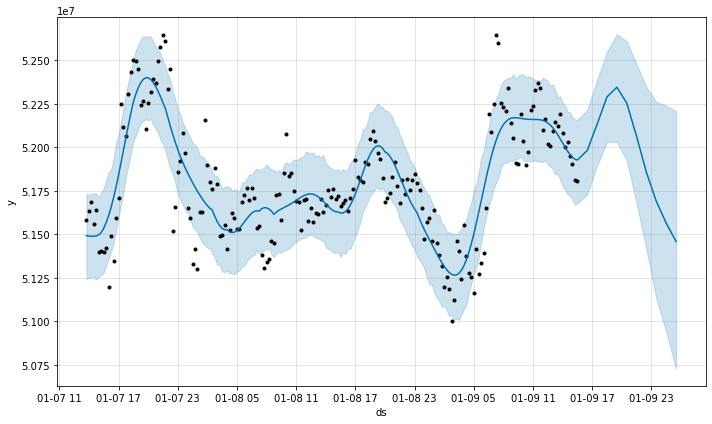

In [ ]:
#그래프1
fig1 = model.plot(forecast)

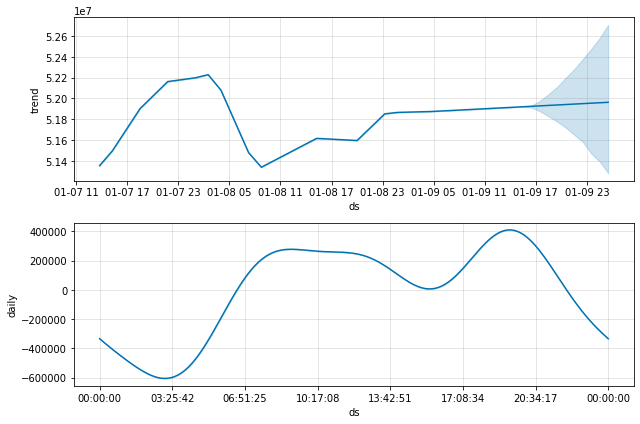

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)